<a href="https://colab.research.google.com/github/dineshnain00/Imdb_Analysis/blob/main/Data_Analysis_of_Imdb_movies_websites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gzip
import requests
from io import BytesIO

# ===============================
# 1️⃣ Download IMDb datasets
# ===============================
def download_imdb_dataset(url):
    print(f"Downloading {url} ...")
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        return gzip.decompress(response.content)
    else:
        raise Exception(f"Failed to download {url}")

# IMDb datasets
basics_url = "https://datasets.imdbws.com/title.basics.tsv.gz"
ratings_url = "https://datasets.imdbws.com/title.ratings.tsv.gz"

# Load datasets into DataFrames
basics_data = download_imdb_dataset(basics_url)
ratings_data = download_imdb_dataset(ratings_url)

basics_df = pd.read_csv(BytesIO(basics_data), sep='\t', dtype=str)
ratings_df = pd.read_csv(BytesIO(ratings_data), sep='\t', dtype=str)

In [ ]:
# ===============================
# 2️⃣ Clean & merge data
# ===============================
# Keep only movies
movies_df = basics_df[basics_df["titleType"] == "movie"].copy()

# Merge with ratings
movies_df = movies_df.merge(ratings_df, on="tconst", how="left")

# Convert numeric columns
movies_df["averageRating"] = pd.to_numeric(movies_df["averageRating"], errors="coerce")
movies_df["numVotes"] = pd.to_numeric(movies_df["numVotes"], errors="coerce")

# Drop null ratings
movies_df = movies_df.dropna(subset=["averageRating"])

In [ ]:
# ===============================
# 3️⃣ Simulated data for Picture Quality & OTT Sales
# (In real analysis, this would come from external sources)
# ===============================
import numpy as np
np.random.seed(42)

movies_df["Picture_Quality"] = np.random.choice(["HD", "Full HD", "4K"], size=len(movies_df))
movies_df["OTT_Sales"] = np.random.randint(10000, 500000, size=len(movies_df))
movies_df["Cinema_Collection"] = np.random.randint(50000, 10000000, size=len(movies_df))

In [ ]:

# ===============================
# 4️⃣ Analysis Section
# ===============================

# ---- Top Movies by Genre ----
top_by_genre = (
    movies_df.dropna(subset=["genres"])
    .groupby("genres")
    .apply(lambda x: x.sort_values("averageRating", ascending=False).head(5))
    .reset_index(drop=True)
)

print("\n🎬 Top 5 Movies by Genre:")
print(top_by_genre[["primaryTitle", "genres", "averageRating", "numVotes"]].head(20))


🎬 Top 5 Movies by Genre:
                                         primaryTitle                  genres  \
0                         The Legend of Man and Loong                  Action   
1                                   Vilangu Therikkum                  Action   
2                                         Whiskey Run                  Action   
3                                     Veerathin Magan                  Action   
4                           The Return of Uncle Benon                  Action   
5                                        Tourist Trap            Action,Adult   
6                                             Therapy            Action,Adult   
7                                      Weekend Lockup            Action,Adult   
8                         The Young and the Wrestling            Action,Adult   
9                                        Dirty Tricks            Action,Adult   
10                                         Black Love  Action,Adult,Adventure   
11

/tmp/ipython-input-3909690697.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("averageRating", ascending=False).head(5))


In [ ]:

# ---- Top Movies by Rating ----
top_by_rating = movies_df.sort_values("averageRating", ascending=False).head(10)
print("\n⭐ Top 10 Movies by IMDb Rating:")
print(top_by_rating[["primaryTitle", "averageRating", "numVotes", "genres"]])


⭐ Top 10 Movies by IMDb Rating:
                                   primaryTitle  averageRating  numVotes  \
655355                         The Last Partera           10.0       5.0   
451176                       Romeo and Benvolio           10.0      28.0   
587198  Dvoe v odnoy zhizni, ne schitaya sobaki           10.0       5.0   
586945                                 Dabaghor           10.0      13.0   
582793                     Iran: The Great Game           10.0       8.0   
586940                            Brat navsegda           10.0       5.0   
447185                        The Art Whisperer           10.0      16.0   
129029                       El lambiscon verde           10.0       9.0   
525254                          YA tebya slyshu           10.0      10.0   
530018                        Running Milu Deer           10.0       7.0   

                     genres  
655355          Documentary  
451176  Comedy,Drama,Family  
587198        Drama,Romance  
586945    

In [ ]:
# ---- Top Movies by Picture Quality ----
top_by_quality = (
    movies_df.groupby("Picture_Quality")
    .apply(lambda x: x.sort_values("averageRating", ascending=False).head(5))
    .reset_index(drop=True)
)
print("\n🖼️ Top Movies by Picture Quality:")
print(top_by_quality[["primaryTitle", "Picture_Quality", "averageRating"]])


🖼️ Top Movies by Picture Quality:
                               primaryTitle Picture_Quality  averageRating
0      Namas Dei: The Tucker J. James Story              4K           10.0
1                               Out of Time              4K           10.0
2                                    Woolfs              4K           10.0
3              Singularity: A Second Chance              4K           10.0
4                                  Dabaghor              4K           10.0
5                        El lambiscon verde         Full HD           10.0
6               Funérailles (Non ti voglio)         Full HD           10.0
7   Dvoe v odnoy zhizni, ne schitaya sobaki         Full HD           10.0
8                          ADAM: Nartauekel         Full HD           10.0
9                              Die with You         Full HD           10.0
10                       Romeo and Benvolio              HD           10.0
11                            Brat navsegda              HD      

/tmp/ipython-input-499935441.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("averageRating", ascending=False).head(5))


In [ ]:

# ---- Top Movies by OTT Sales ----
top_ott_sales = movies_df.sort_values("OTT_Sales", ascending=False).head(10)
print("\n💻 Top 10 Movies by OTT Sales:")
print(top_ott_sales[["primaryTitle", "OTT_Sales", "averageRating"]])


💻 Top 10 Movies by OTT Sales:
                                     primaryTitle  OTT_Sales  averageRating
639748                               Hello Mumbai     499998            3.7
294040  Billy Flanigan: The Happiest Man on Earth     499998            8.2
605333                              Man on Bridge     499997            8.5
360636                              Pfarrer Iseli     499994            5.8
39947                         The Lions Are Loose     499993            5.7
238033           Badamasi (Portrait of a General)     499993            6.1
150189                                  The Beast     499992            4.7
178974                               Fenshui ling     499992            4.7
84948                         En ven i bolignøden     499985            6.2
570505                                Sister Game     499984            5.1


In [ ]:
# ---- Top Movies by Cinema Collection ----
top_cinema_sales = movies_df.sort_values("Cinema_Collection", ascending=False).head(10)
print("\n🎥 Top 10 Movies by Cinema Collection:")
print(top_cinema_sales[["primaryTitle", "Cinema_Collection", "averageRating"]])


🎥 Top 10 Movies by Cinema Collection:
                                   primaryTitle  Cinema_Collection  \
31652                             Heimatglocken            9999987   
46126   Me and My Kid Brother and the Smugglers            9999965   
621346                           A Woman's Life            9999944   
119304                        Sword of Damascus            9999906   
505516                 La Belle Dame Sans Merci            9999877   
322908                                Assailant            9999807   
191685                           Glamour Girl 5            9999748   
88242                     O lumina la etajul 10            9999684   
528483                              Clandestine            9999659   
723076                            Closer to God            9999646   

        averageRating  
31652             5.3  
46126             5.7  
621346            6.4  
119304            5.4  
505516            7.3  
322908            5.2  
191685            6.4 

/tmp/ipython-input-1911210848.py:17: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


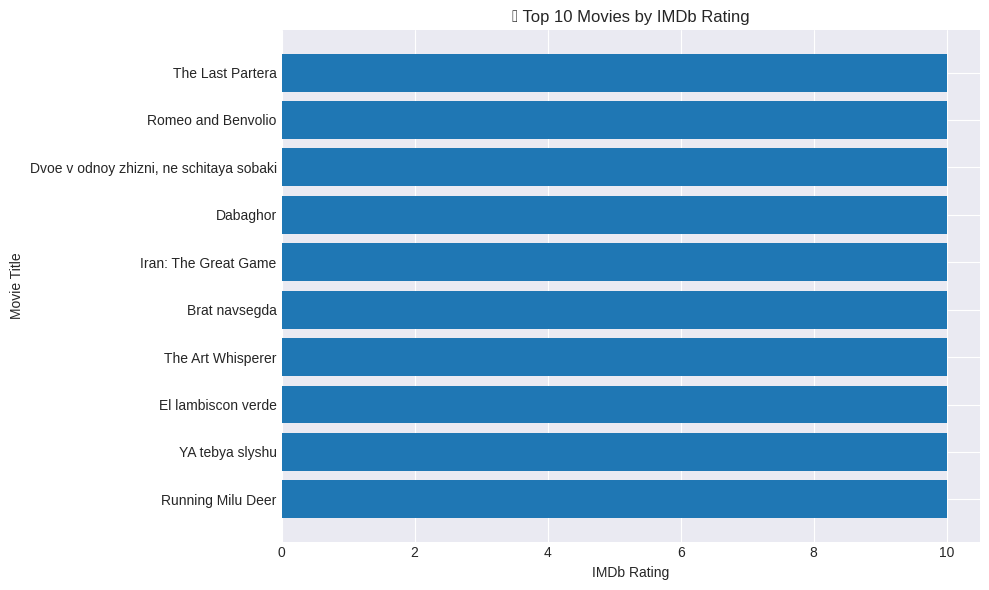

In [ ]:
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
# ===============================
# 5️⃣ Visualization Section
# ===============================

plt.style.use('seaborn-v0_8-darkgrid')

# --- Top 10 Movies by Rating ---
plt.figure(figsize=(10,6))
plt.barh(top_by_rating["primaryTitle"], top_by_rating["averageRating"])
plt.gca().invert_yaxis()
plt.title("⭐ Top 10 Movies by IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


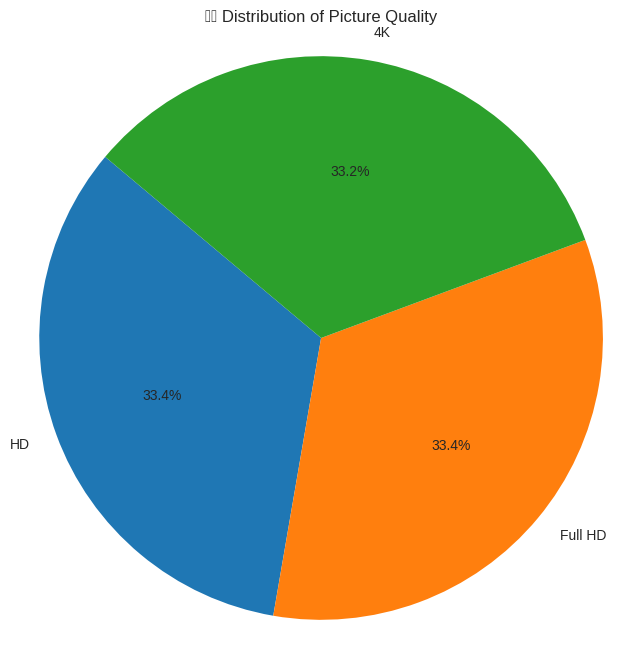

In [ ]:

# --- Distribution of Picture Quality (Pie Chart) ---
plt.figure(figsize=(8, 8))
quality_counts = movies_df["Picture_Quality"].value_counts()
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("🖼️ Distribution of Picture Quality")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-3997639906.py:7: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3997639906.py:7: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


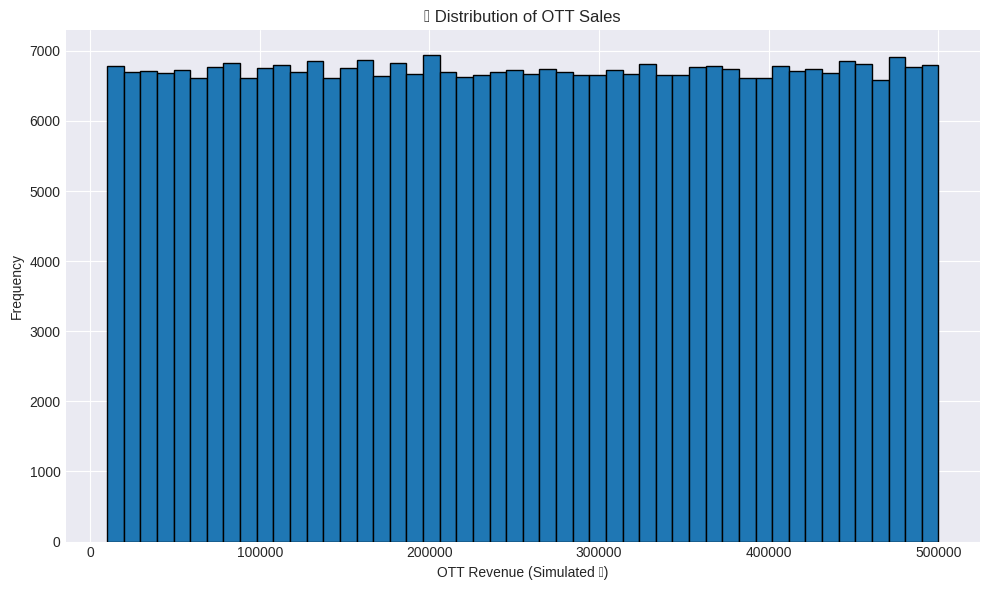

In [ ]:
# --- Distribution of OTT Sales (Histogram) ---
plt.figure(figsize=(10, 6))
plt.hist(movies_df["OTT_Sales"], bins=50, edgecolor='black')
plt.title("💻 Distribution of OTT Sales")
plt.xlabel("OTT Revenue (Simulated ₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3172435459.py:6: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


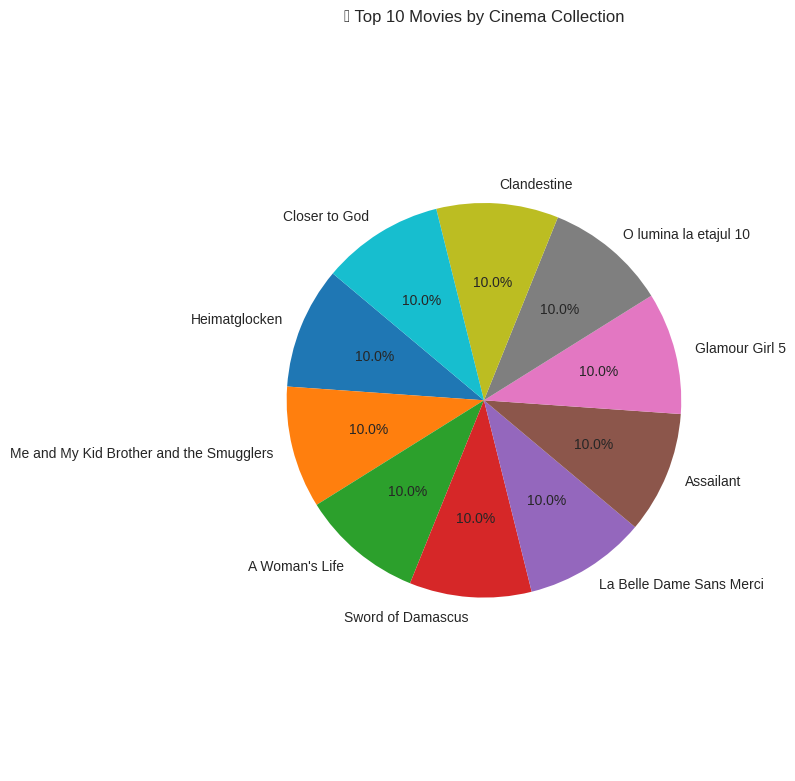

In [ ]:

# --- Top 10 Movies by Cinema Collection ---
plt.figure(figsize=(8, 8))
plt.pie(top_cinema_sales["Cinema_Collection"], labels=top_cinema_sales["primaryTitle"], autopct='%1.1f%%', startangle=140)
plt.title("🎥 Top 10 Movies by Cinema Collection")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [ ]:
# =======================================
# IMDb Movie Analysis with Plotly (Option C)
# =======================================

import pandas as pd
import numpy as np
import gzip
import requests
from io import BytesIO
import plotly.express as px

# ---------------------------------------
# 1️⃣ Download IMDb datasets
# ---------------------------------------
def download_imdb_dataset(url):
    print(f"Downloading {url} ...")
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        return gzip.decompress(response.content)
    else:
        raise Exception(f"Failed to download {url}")

basics_url = "https://datasets.imdbws.com/title.basics.tsv.gz"
ratings_url = "https://datasets.imdbws.com/title.ratings.tsv.gz"

basics_data = download_imdb_dataset(basics_url)
ratings_data = download_imdb_dataset(ratings_url)

basics_df = pd.read_csv(BytesIO(basics_data), sep='\t', dtype=str)
ratings_df = pd.read_csv(BytesIO(ratings_data), sep='\t', dtype=str)

# ---------------------------------------
# 2️⃣ Clean & Merge Data
# ---------------------------------------
movies_df = basics_df[basics_df["titleType"] == "movie"].copy()
movies_df = movies_df.merge(ratings_df, on="tconst", how="left")

movies_df["averageRating"] = pd.to_numeric(movies_df["averageRating"], errors="coerce")
movies_df["numVotes"] = pd.to_numeric(movies_df["numVotes"], errors="coerce")
movies_df = movies_df.dropna(subset=["averageRating"])

# Keep only movies with at least 1000 votes
movies_df = movies_df[movies_df["numVotes"] >= 1000]

# ---------------------------------------
# 3️⃣ Split multi-genre movies properly
# ---------------------------------------
movies_df["genres"] = movies_df["genres"].fillna("Unknown")
movies_df["genres_list"] = movies_df["genres"].str.split(",")
movies_exploded = movies_df.explode("genres_list").rename(columns={"genres_list": "genre"})

# ---------------------------------------
# 4️⃣ Simulate extra data (Picture Quality, OTT, Cinema)
# ---------------------------------------
np.random.seed(42)
movies_exploded["Picture_Quality"] = np.random.choice(["HD", "Full HD", "4K"], size=len(movies_exploded))
movies_exploded["OTT_Sales"] = np.random.randint(10000, 500000, size=len(movies_exploded))
movies_exploded["Cinema_Collection"] = np.random.randint(50000, 10000000, size=len(movies_exploded))

# ---------------------------------------
# 5️⃣ Analysis Computations
# ---------------------------------------
# Top Movies by Genre (Top 5 per genre)
top_by_genre = (
    movies_exploded.groupby("genre", group_keys=False)
    .apply(lambda x: x.sort_values("averageRating", ascending=False).head(5))
    .reset_index(drop=True)
)

# Top Movies by Rating
top_by_rating = movies_exploded.sort_values("averageRating", ascending=False).head(10)

# Top Movies by OTT and Cinema Collections
top_ott = movies_exploded.sort_values("OTT_Sales", ascending=False).head(10)
top_cinema = movies_exploded.sort_values("Cinema_Collection", ascending=False).head(10)

# ---------------------------------------
# 6️⃣ Interactive Visualizations (Plotly)
# ---------------------------------------

# ⭐ Top 10 Movies by IMDb Rating
fig_rating = px.bar(
    top_by_rating,
    x="averageRating",
    y="primaryTitle",
    color="genre",
    orientation="h",
    hover_data=["numVotes", "genre"],
    title="⭐ Top 10 Movies by IMDb Rating",
)
fig_rating.update_layout(yaxis=dict(autorange="reversed"))
fig_rating.show()

# 💻 Top 10 Movies by OTT Sales
fig_ott = px.bar(
    top_ott,
    x="OTT_Sales",
    y="primaryTitle",
    color="Picture_Quality",
    orientation="h",
    hover_data=["averageRating", "genre"],
    title="💻 Top 10 Movies by OTT Sales (Simulated)",
)
fig_ott.update_layout(yaxis=dict(autorange="reversed"))
fig_ott.show()

# 🎥 Top 10 Movies by Cinema Collection
fig_cinema = px.bar(
    top_cinema,
    x="Cinema_Collection",
    y="primaryTitle",
    color="genre",
    orientation="h",
    hover_data=["averageRating", "Picture_Quality"],
    title="🎥 Top 10 Movies by Cinema Box Office Collection (Simulated)",
)
fig_cinema.update_layout(yaxis=dict(autorange="reversed"))
fig_cinema.show()

# 🎭 Optional: Dropdown to filter by Genre
fig_genre = px.scatter(
    top_by_genre,
    x="averageRating",
    y="genre",
    size="numVotes",
    color="Picture_Quality",
    hover_data=["primaryTitle"],
    title="🎭 Top 5 Movies by Genre (Interactive)",
)
fig_genre.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig_genre.show()

# ---------------------------------------
# 7️⃣ Export results (optional)
# ---------------------------------------
top_by_genre.to_csv("top_movies_by_genre.csv", index=False)
top_by_rating.to_csv("top_movies_by_rating.csv", index=False)
top_ott.to_csv("top_movies_by_ott.csv", index=False)
top_cinema.to_csv("top_movies_by_cinema.csv", index=False)

print("\n✅ Analysis completed and interactive charts displayed successfully.")

/tmp/ipython-input-3837013649.py:66: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




✅ Analysis completed and interactive charts displayed successfully.
